In [1]:
import os
import urllib
import tarfile
import pandas as pd
import numpy as np

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [5]:
fetch_housing_data()
housing = load_housing_data()
housing[:20]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

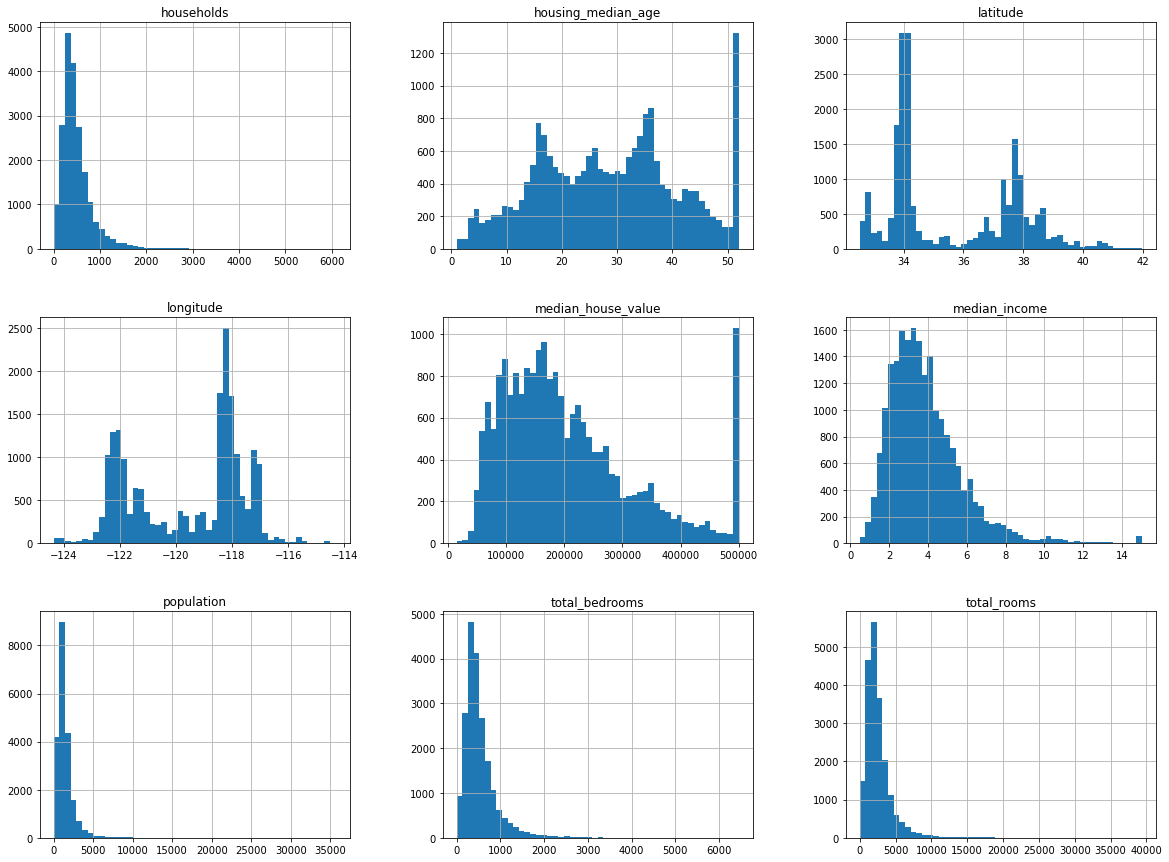

In [10]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    
    

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

In [13]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

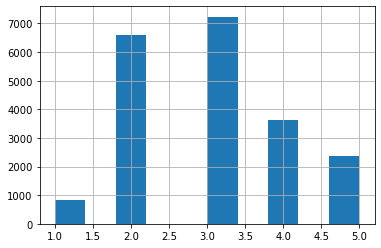

In [15]:
housing['income_cat'].hist()

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_train_set[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [20]:
strat_test_set['income_cat'].value_counts()/strat_test_set.shape[0]*100

3    35.053295
2    31.879845
4    17.635659
5    11.458333
1     3.972868
Name: income_cat, dtype: float64

In [21]:
# calculating the proportion in the overall dataframe 

In [22]:
housing['income_cat'].value_counts()/housing.shape[0]*100

3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64

In [23]:
for _ in (strat_train_set, strat_test_set):
    _.drop('income_cat', axis=1, inplace=True)

In [24]:
strat_test_set[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


In [25]:
# let's start with exploring the data

In [26]:
housing = strat_train_set.copy()

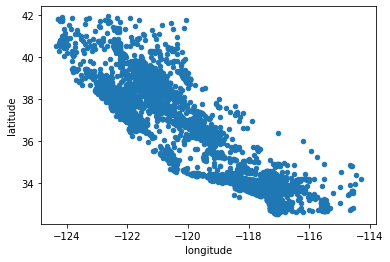

In [27]:
housing.plot(kind='scatter', x='longitude', y='latitude')

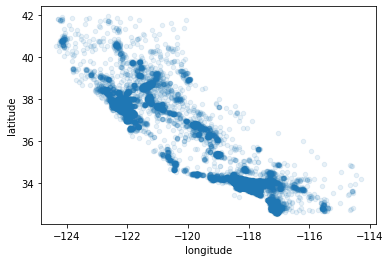

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

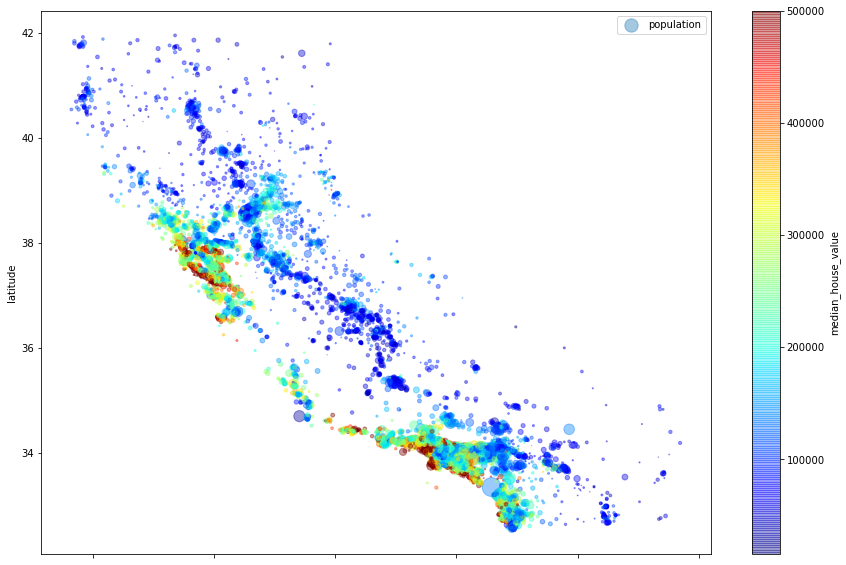

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(15,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [30]:
corr_matrix = housing.corr()

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [32]:
from pandas.plotting import scatter_matrix

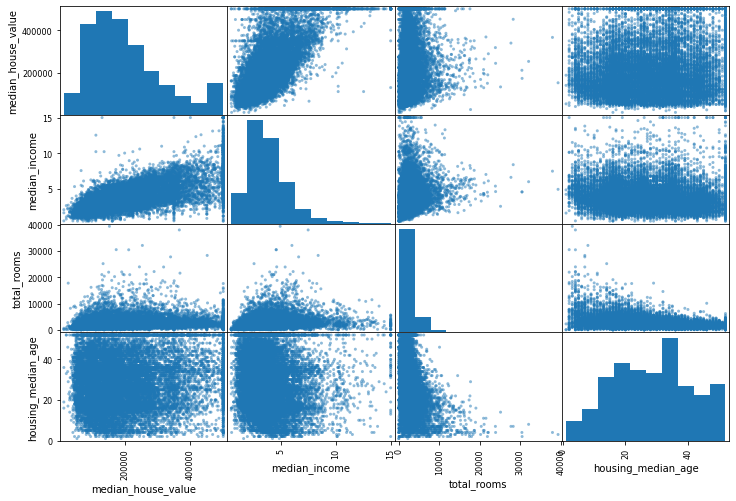

In [33]:
attributes =["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

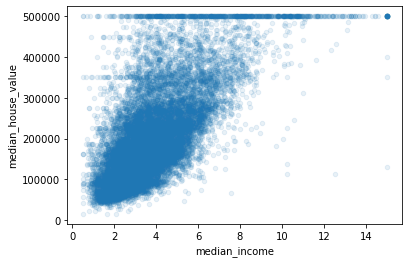

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [37]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [40]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [41]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [42]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [43]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [44]:
X = imputer.transform(housing_num)

In [45]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [46]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
housing_num_tr[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679]])

In [65]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
some_data_prepared = full_pipeline.fit_transform(housing[:3])

In [66]:
housing_prepared[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [67]:
some_data_prepared

array([[-0.69808017,  0.76410893,  1.02538886,  0.31572948,  0.27151722,
         0.2276833 ,  0.237548  , -0.75260801,  1.        ,  0.        ],
       [-0.71609514,  0.64852943, -1.35615946, -1.3516973 , -1.33771901,
        -1.32260971, -1.32611745,  1.41321571,  1.        ,  0.        ],
       [ 1.41417531, -1.41263836,  0.3307706 ,  1.03596782,  1.06620179,
         1.09492642,  1.08856945, -0.6606077 ,  0.        ,  1.        ]])

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.fit_transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 11)

In [68]:
some_data_prepared[:5]

array([[-0.69808017,  0.76410893,  1.02538886,  0.31572948,  0.27151722,
         0.2276833 ,  0.237548  , -0.75260801,  1.        ,  0.        ],
       [-0.71609514,  0.64852943, -1.35615946, -1.3516973 , -1.33771901,
        -1.32260971, -1.32611745,  1.41321571,  1.        ,  0.        ],
       [ 1.41417531, -1.41263836,  0.3307706 ,  1.03596782,  1.06620179,
         1.09492642,  1.08856945, -0.6606077 ,  0.        ,  1.        ]])

In [98]:
df = pd.DataFrame(np.array([
    [1,2,3,4,'M'],
    [5,'N/A',7,8,'F'],
    [9,10,11,12,'F'],
    [13,14,'N/A',16,'M'],
    ['N/A',18,19,20,'M'],
    [21,22,23,24,'M'],
    [25,26,'N/A',28,'M'],
    [29,30,31,32,'F'],
    [33,'N/A',35,36,'F'],
    [37,38,39,40,'M']]), columns =['One', 'Two', 'Three', 'Four','Five']
                 )

In [99]:
df

,One,Two,Three,Four,Five
0,1,2,3,4,M
1,5,N/A,7,8,F
2,9,10,11,12,F
3,13,14,N/A,16,M
4,N/A,18,19,20,M
5,21,22,23,24,M
6,25,26,N/A,28,M
7,29,30,31,32,F
8,33,N/A,35,36,F
9,37,38,39,40,M


In [100]:
df.replace('N/A',np.NaN, inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   One     9 non-null      object
 1   Two     8 non-null      object
 2   Three   8 non-null      object
 3   Four    10 non-null     object
 4   Five    10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [106]:
df_num = df.drop('Five', axis=1)

In [103]:
num_df[:5]

,One,Two,Three,Four
0,1,2,3,4
1,5,NaN,7,8
2,9,10,11,12
3,13,14,NaN,16
4,NaN,18,19,20


In [104]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler()),
])


In [107]:
num_attribs = list(df_num)
cat_attribs = ['Five']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [108]:
df_prepared = full_pipeline.fit_transform(df)

In [117]:
import pandas as pd
pd.DataFrame(df_prepared)

,0,1,2,3,4,5
0,-1.602486,-1.868523,-1.611258,-1.566699,0.0,1.0
1,-1.254119,0.000000,-1.253201,-1.218544,1.0,0.0
2,-0.905753,-1.038068,-0.895144,-0.870388,1.0,0.0
3,-0.557386,-0.622841,0.000000,-0.522233,0.0,1.0
4,0.139347,-0.207614,-0.179029,-0.174078,0.0,1.0
5,0.139347,0.207614,0.179029,0.174078,0.0,1.0
6,0.487713,0.622841,0.000000,0.522233,0.0,1.0
7,0.836080,1.038068,0.895144,0.870388,1.0,0.0
8,1.184446,0.000000,1.253201,1.218544,1.0,0.0
9,1.532813,1.868523,1.611258,1.566699,0.0,1.0


In [115]:
df_subset_prepared = full_pipeline.fit_transform(df.iloc[:9])

In [116]:
pd.DataFrame(df_subset_prepared)

,0,1,2,3,4,5
0,-1.549193,-1.975164,-1.574724,-1.549193,0.0,1.0
1,-1.161895,0.056433,-1.169795,-1.161895,1.0,0.0
2,-0.774597,-0.959366,-0.764866,-0.774597,1.0,0.0
3,-0.387298,-0.451466,0.044992,-0.387298,0.0,1.0
4,0.000000,0.056433,0.044992,0.000000,0.0,1.0
5,0.387298,0.564333,0.449921,0.387298,0.0,1.0
6,0.774597,1.072232,0.044992,0.774597,0.0,1.0
7,1.161895,1.580131,1.259780,1.161895,1.0,0.0
8,1.549193,0.056433,1.664709,1.549193,1.0,0.0
